<a href="https://colab.research.google.com/github/TacticalCoders/2022-kisti/blob/main/kisiti_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 패키지 설치

In [1]:
# pytorch 1.8.1 설치
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 76.3 MB/s eta 0:00:16tcmalloc: large alloc 1147494400 bytes == 0x394fc000 @  0x7fdcdc0a5615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████████████████               | 1055.7 MB 68.6 MB/s eta 0:00:14tcmalloc: large alloc 1434370048 bytes == 0x7db52000 @  0x7fdcdc0a5615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |███

In [2]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=9cb08bfb71f29a01c4b274daed27e1ff6309f7134eee94bb6cc4139747488c20
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 163 kB 85.9 MB/s 
     |████████████████████████████████| 7.6 MB 82.3 MB/s 


In [5]:
!pip install konlpy==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.1 MB/s 
     |████████████████████████████████| 453 kB 85.4 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### mecab 설치
kisti 전용 토크나이저를 사용하기 위해 설치 필요

In [6]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http

## 구글 드라이브 마운트

데이터셋, 어휘사전 등의 파일을 위해 구글 드라이브 마운트

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### import

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

import os
import config
from tqdm import tqdm
import json

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
#from seqeval.metrics import precision_score, recall_score, f1_score

import numpy as np
from tqdm import tqdm
import argparse

import transformers
from transformers import AutoConfig, AutoModel, AutoTokenizer
from transformers.optimization import AdamW, get_linear_schedule_with_warmup

## config.py

In [9]:
# root_dir = os.path.dirname(os.path.abspath(__file__))
# root_dir = os.path.abspath('') # 현재 스크립트가 실행되는 위치
# cache_dir = os.path.join(root_dir, "cache")
# output_dir = os.path.join(root_dir, "학습된 모델 파일 이름") # 저장할 파일 이름 지정
# data_dir = os.path.join(root_dir, "data")
root_dir = '/content/drive/MyDrive/kisti_baseline'
cache_dir = root_dir + "/cache"
output_dir = root_dir + "/모델파일(.pt)이 저장될 위치" # 추후 저장될 모델의 이름 지정해야 함
data_dir = root_dir + "/data"

In [10]:
print("root_dir:", root_dir)
print("cache_dir:", cache_dir)
print("output_dir:", output_dir)
print("data_dir:",data_dir)

root_dir: /content/drive/MyDrive/kisti_baseline
cache_dir: /content/drive/MyDrive/kisti_baseline/cache
output_dir: /content/drive/MyDrive/kisti_baseline/for_coembedding
data_dir: /content/drive/MyDrive/kisti_baseline/data


In [11]:
# root_dir로 실행위치 이동
%cd /content/drive/MyDrive/kisti_baseline

/content/drive/MyDrive/kisti_baseline


## Mecab에 사용자 사전 추가



*   pap_all_mecab_dic.csv
*   pat_all_mecab_dic.csv

을 /tmp/mecab-ko-dic-2.1.1-20180720으로 복사.

참고로 kisti_tokenization에 mecab 경로 역시 /tmp/mecab-ko-dic-2.1.1-20180720으로 지정했음.


In [12]:
%cp pap_all_mecab_dic.csv /tmp/mecab-ko-dic-2.1.1-20180720
%cp pat_all_mecab_dic.csv /tmp/mecab-ko-dic-2.1.1-20180720

## preprocessing.py

데이터셋을 읽어와서 토큰화 진행 후 데이터셋 클래스로 반환.

다만 2022년에는 kisti에서 지정한 토크나이저를 이용해야 하므로 수정함.

이전 토크나이저는 단어 단위("sentence")로 토크나이저에 입력, 하지만 kisti 토크나이저는 문장("origin_sent")만 넣어주면 되므로 이에 맞게 수정.

In [13]:
"""
  입력 문장, 대분류, 세부분류 태그를 전처리 코드
"""

fine_vocab_path = data_dir + "/fine_vocab.txt"
coarse_vocab_path = data_dir + "/coarse_vocab.txt"

fine_vocab_map_str = {}
coarse_vocab_map_str = {}

with open(fine_vocab_path, 'r', encoding='utf-8') as vocab:
    for label in vocab:
        label = label.strip()
        fine_vocab_map_str[label] = len(fine_vocab_map_str)
print(fine_vocab_map_str)

with open(coarse_vocab_path, 'r', encoding='utf-8') as vocab:
    for label in vocab:
        label = label.strip()
        coarse_vocab_map_str[label] = len(coarse_vocab_map_str)
print(coarse_vocab_map_str)

# 학습 or 평가 데이터를 읽어 리스트에 저장
def read_data(file_path, mode):
    datas = []
    with open(file_path, "r", encoding="utf8") as json_file:
        for index, json_line in enumerate(tqdm(json_file, desc='read_data')):
            json_data = json.loads(json_line)

            origin_sent = json_data["sentence"]
            # sentence = json_data["sentence"].split(" ")
            sentence = ""
            coarse_tag = json_data["coarse_tag"]
            fine_tag = json_data["fine_tag"]

            coarse_tag = coarse_vocab_map_str[coarse_tag]
            fine_tag = fine_vocab_map_str[fine_tag]

            datas.append((origin_sent, sentence, fine_tag, coarse_tag))

    return datas


def convert_data2dataset(datas, tokenizer, max_length, coarse_tags, fine_tags, mode):
    total_input_ids, total_attention_mask, total_token_type_ids, total_coarse_tags, total_coarse_seq, total_fine_tags, total_fine_seq, total_word_seq = [], [], [], [], [], [], [], []

    if mode == "analyze":
        total_fine_tags = None

    for index, data in enumerate(tqdm(datas, desc="convert_data2dataset")):
        sentence = []
        fine_tag = []
        coarse_tag = []

        if mode == "train" or mode == "test":
            origin_sent, sentence, fine_tag, coarse_tag = data

        tokens = []
        fine_ids = []

        # for word in sentence: # 여기서 sentence는 공백으로 split된 단어들의 리스트임.
        #     word_tokens = tokenizer.tokenize(word.lower())
        #     tokens.extend(word_tokens)

        tokens = tokenizer.tokenize(origin_sent)

        tokens = ["[CLS]"] + tokens
        tokens = tokens[:max_length-1]
        tokens.append("[SEP]")

        input_ids = sum([tokenizer.convert_tokens_to_ids([token]) for token in tokens],[])

        assert len(input_ids) <= max_length

        attention_mask = [1] * len(input_ids)
        token_type_ids = [0] * len(input_ids)

        padding = [0] * (max_length - len(input_ids))

        total_word_seq.append(len(input_ids))

        input_ids += padding
        attention_mask += padding
        token_type_ids += padding

        total_input_ids.append(input_ids)
        total_attention_mask.append(attention_mask)
        total_token_type_ids.append(token_type_ids)

        total_coarse_seq.append([i for i in range(coarse_tags)])
        total_fine_seq.append([i for i in range(fine_tags)])

        total_coarse_tags.append(coarse_tag)
        total_fine_tags.append(fine_tag)

    total_input_ids = torch.tensor(total_input_ids, dtype=torch.long)
    total_attention_mask = torch.tensor(total_attention_mask, dtype=torch.long)
    total_token_type_ids = torch.tensor(total_token_type_ids, dtype=torch.long)

    total_coarse_seq = torch.tensor(total_coarse_seq, dtype=torch.long)
    total_fine_seq = torch.tensor(total_fine_seq, dtype=torch.long)

    total_word_seq = torch.tensor(total_word_seq, dtype=torch.long)

    if mode == "train" or mode == "test":
        total_coarse_tags = torch.tensor(total_coarse_tags, dtype=torch.long)
        total_fine_tags = torch.tensor(total_fine_tags, dtype=torch.long)

        dataset = TensorDataset(total_input_ids, total_attention_mask, total_token_type_ids, total_coarse_tags,
                            total_coarse_seq, total_fine_tags, total_fine_seq, total_word_seq)
        
    return dataset


{'문제 정의': 0, '가설 설정': 1, '기술 정의': 2, '제안 방법': 3, '대상 데이터': 4, '데이터처리': 5, '이론/모형': 6, '성능/효과': 7, '후속연구': 8}
{'연구 목적': 0, '연구 방법': 1, '연구 결과': 2}


## model.py

2021 수상작에서 설계한 모델

In [14]:
"""
    대분류/세부분류 모델
"""
class SequenceClassification(nn.Module):
    def __init__(self, config, model, coarse_emb_size, coarse_size, fine_emb_size, fine_size, lstm_hidden, num_layer, bilstm_flag):
        super().__init__()
        self.config = config

        self.model = model

        assert fine_emb_size == lstm_hidden * 2, "Please set score-embedding-size to twice the lstm-hidden-size"

        # 분류할 라벨의 개수
        #self.num_labels = config.num_labels

        self.n_hidden = lstm_hidden

        self.coarse_emb = nn.Embedding(coarse_size, coarse_emb_size, scale_grad_by_freq=True)
        self.fine_emb = nn.Embedding(fine_size, fine_emb_size, scale_grad_by_freq=True)

        self.num_layers = num_layer
        self.bidirectional = 2 if bilstm_flag else 1

        self.coarse_label_lstm_first = nn.LSTM(config.hidden_size, self.n_hidden, bidirectional=True, batch_first=True)
        self.coarse_label_lstm_last = nn.LSTM(lstm_hidden * 4, self.n_hidden, num_layers=self.num_layers, batch_first=True, bidirectional=bilstm_flag)

        ## 사전학습 언어모델 : base = lstm_hidden * 5 / large = lstm_hidden * 6
        self.fine_label_lstm_first = nn.LSTM(lstm_hidden * 5, self.n_hidden, bidirectional=True, batch_first=True)

        self.fine_label_lstm_last = nn.LSTM(lstm_hidden * 4, self.n_hidden, num_layers=self.num_layers, batch_first=True, bidirectional=bilstm_flag)

        self.coarse_q_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)
        self.coarse_k_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)
        self.coarse_v_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)

        self.fine_q_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)
        self.fine_k_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)
        self.fine_v_liner = nn.Linear(self.n_hidden * 2, self.n_hidden * 2)

        self.dropout = nn.Dropout(config.hidden_dropout_prob)

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, coarse_labels=None, coarse_label_seq_tensor=None, fine_labels=None, fine_label_seq_tensor=None, word_seq_lengths=None):

        discriminator_hidden_states = self.model(input_ids, attention_mask)

        # (batch_size, max_length, hidden_size)
        discriminator_hidden_states = discriminator_hidden_states[0]

        coarse_embs = self.coarse_emb(coarse_label_seq_tensor)
        fine_embs = self.fine_emb(fine_label_seq_tensor)

        hidden = None
        scaler = self.n_hidden ** 0.5

        """
        coarse tag predict layer
        """
        coarse_lstm_outputs, hidden = self.coarse_label_lstm_first(discriminator_hidden_states, hidden)
        coarse_lstm_outputs = self.dropout(coarse_lstm_outputs)

        coarse_q = self.coarse_q_liner(coarse_lstm_outputs)
        coarse_k = self.coarse_k_liner(coarse_embs)
        coarse_v = self.coarse_v_liner(coarse_embs)

        coarse_attention_score = coarse_q.matmul(coarse_k.permute(0, 2, 1)) / scaler
        coarse_attention_align = self.softmax(coarse_attention_score)

        coarse_attention_output = coarse_attention_align.matmul(coarse_v)
        coarse_attention_output = self.dropout(coarse_attention_output)

        coarse_lstm_outputs = torch.cat([coarse_lstm_outputs, coarse_attention_output], dim=-1)
        coarse_lstm_outputs, hidden = self.coarse_label_lstm_last(coarse_lstm_outputs, hidden)
        coarse_lstm_outputs = self.dropout(coarse_lstm_outputs)

        coarse_q = self.coarse_q_liner(coarse_lstm_outputs)
        coarse_k = self.coarse_k_liner(coarse_embs)

        coarse_attention_score = coarse_q.matmul(coarse_k.permute(0, 2, 1)) / scaler
        coarse_attention_score = self.dropout(coarse_attention_score)

        final_coarse_attention_score = coarse_attention_score[:, 0, :]

        """
        coarse tag & fine tag concat
        """
        coarse_attention_score = coarse_attention_score.matmul(coarse_embs) # [batch_size, max_length, max_length]
        coarse_attention_score = torch.cat([discriminator_hidden_states, coarse_attention_score], dim=-1)

        """
        fine tag predict layer
        """
        fine_lstm_outputs, hidden = self.fine_label_lstm_first(coarse_attention_score, hidden)
        fine_lstm_outputs = self.dropout(fine_lstm_outputs)

        fine_q = self.fine_q_liner(fine_lstm_outputs)  # [batch_size, max_length]
        fine_k = self.fine_k_liner(fine_embs)  # [batch_size, tag_size, max_length]
        fine_v = self.fine_v_liner(fine_embs)  # [tag_size, max_length]

        fine_attention_score = fine_q.matmul(fine_k.permute(0, 2, 1)) / scaler
        fine_attention_align = self.softmax(fine_attention_score)  # [batch_size, tag_size]

        fine_attention_output = fine_attention_align.matmul(fine_v)
        fine_attention_output = self.dropout(fine_attention_output)  # [batch_size, max_length]

        fine_lstm_outputs = torch.cat([fine_lstm_outputs, fine_attention_output], dim=-1)
        fine_lstm_outputs, hidden = self.fine_label_lstm_last(fine_lstm_outputs, hidden)
        fine_lstm_outputs = self.dropout(fine_lstm_outputs)

        fine_q = self.fine_q_liner(fine_lstm_outputs)
        fine_k = self.fine_k_liner(fine_embs)

        fine_attention_score = fine_q.matmul(fine_k.permute(0, 2, 1)) / scaler
        fine_attention_score = self.dropout(fine_attention_score)
        final_fine_attention_score = fine_attention_score[:, 0, :]

        return final_coarse_attention_score, final_fine_attention_score

## main_fuctions.py

In [20]:
import tokenization_kisti as tokenization

def get_score(predicts, corrects, idx2label):

    result = {}

    def get_score_one_class(predicts, corrects, value):
        TP, FP, FN, TN = 0, 0, 0, 0

        for correct, predict in zip(corrects, predicts):

            if (correct == value and predict == value):
                TP += 1
            elif (correct != value and predict == value):
                FP += 1
            elif (correct == value and predict != value):
                FN += 1
            elif (correct != value and predict != value):
                TN += 1

        if (TP == 0):
            precision, recall, f1_score, accuracy = 0, 0, 0, 0
        else:
            precision = float(TP) / (TP + FP)
            recall = float(TP) / (TP + FN)
            f1_score = (2 * precision * recall) / (precision + recall)
            accuracy = float(TP + TN) / (TP + FN + FP + TN)

        return precision, recall, f1_score, accuracy, TP, FP, FN, TN

    values = list(idx2label.values())

    for value in values:
        precision, recall, f1_score, accuracy, TP, FP, FN, TN = get_score_one_class(predicts, corrects, value)
        result[value] = {"precision": precision, "recall": recall, "f1_score": f1_score, "accuracy": accuracy,
                         "TP": TP, "FP": FP, "FN": FN, "TN": TN}

    macro_precision = np.sum([result[value]["precision"] for value in values]) / len(values)
    macro_recall = np.sum([result[value]["recall"] for value in values]) / len(values)
    macro_f1_score = np.sum([result[value]["f1_score"] for value in values]) / len(values)
    total_accuracy = np.sum([result[value]["accuracy"] for value in values]) / len(values)

    total_TP = np.sum([result[value]["TP"] for value in values])
    total_FP = np.sum([result[value]["FP"] for value in values])
    total_FN = np.sum([result[value]["FN"] for value in values])
    total_TN = np.sum([result[value]["TN"] for value in values])

    if (total_TP == 0):
        micro_precision, micro_recall, micro_f1_score, accuracy = 0, 0, 0, 0
    else:
        micro_precision = float(total_TP) / (total_TP + total_FP)
        micro_recall = float(total_TP) / (total_TP + total_FN)
        micro_f1_score = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall)

    for value in values:
        precision, recall, f1_score = result[value]["precision"], result[value]["recall"], result[value]["f1_score"]
        TP, FP, FN, TN = result[value]["TP"], result[value]["FP"], result[value]["FN"], result[value]["TN"]

        print("Precision from {} : ".format(value) + str(round(precision, 4)))
        print("Recall from {} : ".format(value) + str(round(recall, 4)))
        print("F1_score from {} : ".format(value) + str(round(f1_score, 4)))
        print("Accuracy from {} : ".format(value) + str(round(total_accuracy, 4)))
        print()

    return {"macro_precision": round(macro_precision, 4), "macro_recall": round(macro_recall, 4),
            "macro_f1_score": round(macro_f1_score, 4),
            "accuracy": round(total_accuracy, 4),
            "micro_precision": round(micro_precision, 4), "micro_recall": round(micro_recall, 4),
            "micro_f1": round(micro_f1_score, 4)}

class Helper():
    def __init__(self, config):
        self.config = config

    def do_train(self, model, optimizer, scheduler, train_dataloader, epoch, global_step):
        criterion = nn.CrossEntropyLoss()

        coarse_map = self.config["coarse_map"]
        fine_map = self.config["fine_map"]

        # batch 단위 별 loss를 담을 리스트
        losses = []

        # 모델의 출력 결과와 실제 정답값을 담을 리스트
        total_coarse_pred_label, total_coarse_gold_label = None, None
        total_fine_pred_label, total_fine_gold_label = None, None

        total_coarse_pred, total_coarse_correct = 0, 0
        total_fine_pred, total_fine_correct = 0, 0
        total_coarse_fine_pred, total_coarse_fine_correct = 0, 0

        for step, batch in enumerate(tqdm(train_dataloader, desc="do_train(epoch_{})".format(epoch))):
            batch = tuple(t.cuda() for t in batch)

            input_ids, attention_mask, token_type_ids, coarse_labels, coarse_seq, fine_labels, fine_seq, word_len_seq = \
                batch[0], batch[1], batch[2], batch[3], batch[4], batch[5], batch[6], batch[7]

            # 입력 데이터에 대한 출력과 loss 생성
            coarse_logits, fine_logits = model(input_ids, attention_mask, token_type_ids, coarse_labels, coarse_seq,
                                               fine_labels, fine_seq, word_len_seq)

            coarse_loss = criterion(coarse_logits, coarse_labels)
            coarse_pred = F.softmax(coarse_logits, dim=1)
            coarse_pred = coarse_pred.argmax(dim=1)

            fine_loss = criterion(fine_logits, fine_labels)
            fine_pred = F.softmax(fine_logits, dim=1)
            fine_pred = fine_pred.argmax(dim=1)

            for pred, gold in zip(coarse_pred, coarse_labels):
                if pred == gold:
                    total_coarse_correct += 1
                total_coarse_pred += 1

            for pred, gold in zip(fine_pred, fine_labels):
                if pred == gold:
                    total_fine_correct += 1
                total_fine_pred += 1

            for c_pred, c_gold, f_pred, f_gold in zip(coarse_pred, coarse_labels, fine_pred, fine_labels):
                if c_pred == c_gold and f_pred == f_gold:
                    total_coarse_fine_correct += 1
                total_coarse_fine_pred += 1

            if total_coarse_pred_label is None:
                total_coarse_pred_label = coarse_pred.detach().cpu().numpy()
                total_coarse_gold_label = coarse_labels.detach().cpu().numpy()
            else:
                total_coarse_pred_label = np.append(total_coarse_pred_label, coarse_pred.detach().cpu().numpy(), axis=0)
                total_coarse_gold_label = np.append(total_coarse_gold_label, coarse_labels.detach().cpu().numpy(),
                                                    axis=0)

            if total_fine_pred_label is None:
                total_fine_pred_label = fine_pred.detach().cpu().numpy()
                total_fine_gold_label = fine_labels.detach().cpu().numpy()
            else:
                total_fine_pred_label = np.append(total_fine_pred_label, fine_pred.detach().cpu().numpy(), axis=0)
                total_fine_gold_label = np.append(total_fine_gold_label, fine_labels.detach().cpu().numpy(), axis=0)

            total_loss = fine_loss + coarse_loss

            if self.config["gradient_accumulation_steps"] > 1:
                total_loss = total_loss / self.config["gradient_accumulation_steps"]
            if step % 300 == 0:
                print("\tloss : ", '{:.6f}'.format(total_loss))

            # loss 값으로부터 모델 내부 각 매개변수에 대하여 gradient 계산
            total_loss.backward()
            losses.append(total_loss.data.item())

            if (step + 1) % self.config["gradient_accumulation_steps"] == 0 or \
                    (len(train_dataloader) <= self.config["gradient_accumulation_steps"] and (step + 1) == len(
                        train_dataloader)):
                torch.nn.utils.clip_grad_norm_(model.parameters(), self.config["max_grad_norm"])

                # 모델 내부 각 매개변수 가중치 갱신
                optimizer.step()
                scheduler.step()

                # 변화도를 0으로 변경
                model.zero_grad()
                global_step += 1

        # 정확도 계산
        coarse_acc = total_coarse_correct / total_coarse_pred
        fine_acc = total_fine_correct / total_fine_pred
        coarse_fine_acc = total_coarse_fine_correct / total_coarse_fine_pred

        coarse_pred_label_list = [[] for _ in range(total_coarse_gold_label.shape[0])]
        coarse_gold_label_list = [[] for _ in range(total_coarse_gold_label.shape[0])]

        for i in range(total_coarse_gold_label.shape[0]):
            coarse_gold_label_list[i].append(coarse_map[total_coarse_gold_label[i]])
            coarse_pred_label_list[i].append(coarse_map[total_coarse_pred_label[i]])

        # coarse_precision = precision_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)
        # coarse_recall = recall_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)
        # coarse_f1 = f1_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)

        coarse_precision = precision_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')
        coarse_recall = recall_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')
        coarse_f1 = f1_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')

        fine_pred_label_list = [[] for _ in range(total_fine_gold_label.shape[0])]
        fine_gold_label_list = [[] for _ in range(total_fine_gold_label.shape[0])]

        for i in range(total_fine_gold_label.shape[0]):
            fine_gold_label_list[i].append(fine_map[total_fine_gold_label[i]])
            fine_pred_label_list[i].append(fine_map[total_fine_pred_label[i]])

        # fine_precision = precision_score(fine_gold_label_list, fine_pred_label_list, suffix=True)  # 예측한 것 중, 정답의 비율
        # fine_recall = recall_score(fine_gold_label_list, fine_pred_label_list, suffix=True)  # 찾아야할 것 중, 실제로 찾은 비율
        # fine_f1 = f1_score(fine_gold_label_list, fine_pred_label_list, suffix=True)  # precision과 recall의 평균

        fine_precision = precision_score(fine_gold_label_list, fine_pred_label_list, average='macro')  # 예측한 것 중, 정답의 비율
        fine_recall = recall_score(fine_gold_label_list, fine_pred_label_list, average='macro')  # 찾아야할 것 중, 실제로 찾은 비율
        fine_f1 = f1_score(fine_gold_label_list, fine_pred_label_list, average='macro')  # precision과 recall의 평균

        return coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, np.mean(
            losses), global_step, fine_precision, fine_recall, fine_f1

    def do_evaluate(self, model, test_dataloader, mode):

        coarse_map = self.config["coarse_map"]
        fine_map = self.config["fine_map"]

        # 모델의 입력, 출력, 실제 정답값을 담을 리스트
        total_input_ids = []

        total_coarse_pred_label, total_coarse_gold_label = None, None
        total_fine_pred_label, total_fine_gold_label = None, None

        total_coarse_pred, total_coarse_correct = 0, 0
        total_fine_pred, total_fine_correct = 0, 0
        total_coarse_fine_pred, total_coarse_fine_correct = 0, 0

        for step, batch in enumerate(tqdm(test_dataloader, desc="do_evaluate")):

            batch = tuple(t.cuda() for t in batch)

            input_ids, attention_mask, token_type_ids, coarse_labels, coarse_seq, fine_labels, fine_seq, word_len_seq \
                = batch[0], batch[1], batch[2], batch[3], batch[4], batch[5], batch[6], batch[7]

            # 입력 데이터에 대한 출력 결과 생성
            coarse_logits, fine_logits = model(input_ids, attention_mask, token_type_ids, coarse_labels, coarse_seq,
                                               fine_labels, fine_seq, word_len_seq)

            coarse_pred = F.softmax(coarse_logits, dim=1)
            coarse_pred = coarse_pred.argmax(dim=1)

            fine_pred = F.softmax(fine_logits, dim=1)
            fine_pred = fine_pred.argmax(dim=1)

            for pred, gold in zip(coarse_pred, coarse_labels):
                if pred == gold:
                    total_coarse_correct += 1
                total_coarse_pred += 1

            for pred, gold in zip(fine_pred, fine_labels):
                if pred == gold:
                    total_fine_correct += 1
                total_fine_pred += 1

            for c_pred, c_gold, f_pred, f_gold in zip(coarse_pred, coarse_labels, fine_pred, fine_labels):
                if c_pred == c_gold and f_pred == f_gold:
                    total_coarse_fine_correct += 1
                total_coarse_fine_pred += 1

            if total_coarse_pred_label is None:
                total_coarse_pred_label = coarse_pred.detach().cpu().numpy()
                total_coarse_gold_label = coarse_labels.detach().cpu().numpy()
            else:
                total_coarse_pred_label = np.append(total_coarse_pred_label, coarse_pred.detach().cpu().numpy(), axis=0)
                total_coarse_gold_label = np.append(total_coarse_gold_label, coarse_labels.detach().cpu().numpy(),
                                                    axis=0)

            if total_fine_pred_label is None:
                total_fine_pred_label = fine_pred.detach().cpu().numpy()
                total_fine_gold_label = fine_labels.detach().cpu().numpy()
            else:
                total_fine_pred_label = np.append(total_fine_pred_label, fine_pred.detach().cpu().numpy(), axis=0)
                total_fine_gold_label = np.append(total_fine_gold_label, fine_labels.detach().cpu().numpy(), axis=0)

            input_ids = input_ids.cpu().detach().numpy().tolist()
            total_input_ids += input_ids

        # 정확도 계산
        coarse_acc = total_coarse_correct / total_coarse_pred
        fine_acc = total_fine_correct / total_fine_pred
        coarse_fine_acc = total_coarse_fine_correct / total_coarse_fine_pred

        coarse_pred_label_list = [[] for _ in range(total_coarse_gold_label.shape[0])]
        coarse_gold_label_list = [[] for _ in range(total_coarse_gold_label.shape[0])]

        for i in range(total_coarse_gold_label.shape[0]):
            coarse_gold_label_list[i].append(coarse_map[total_coarse_gold_label[i]])
            coarse_pred_label_list[i].append(coarse_map[total_coarse_pred_label[i]])

        # coarse_precision = precision_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)
        # coarse_recall = recall_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)
        # coarse_f1 = f1_score(coarse_gold_label_list, coarse_pred_label_list, suffix=True)

        coarse_precision = precision_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')
        coarse_recall = recall_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')
        coarse_f1 = f1_score(coarse_gold_label_list, coarse_pred_label_list, average='macro')
        
        fine_pred_label_list = [[] for _ in range(total_fine_gold_label.shape[0])]
        fine_gold_label_list = [[] for _ in range(total_fine_gold_label.shape[0])]

        for i in range(total_fine_gold_label.shape[0]):
            fine_gold_label_list[i].append(fine_map[total_fine_gold_label[i]])
            fine_pred_label_list[i].append(fine_map[total_fine_pred_label[i]])

        # fine_precision = precision_score(fine_gold_label_list, fine_pred_label_list, suffix=True)
        # fine_recall = recall_score(fine_gold_label_list, fine_pred_label_list, suffix=True)
        # fine_f1 = f1_score(fine_gold_label_list, fine_pred_label_list, suffix=True)

        fine_precision = precision_score(fine_gold_label_list, fine_pred_label_list, average='macro')
        fine_recall = recall_score(fine_gold_label_list, fine_pred_label_list, average='macro')
        fine_f1 = f1_score(fine_gold_label_list, fine_pred_label_list, average='macro')

        if (mode == "train"):
            return coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, fine_precision, fine_recall, fine_f1
        else:
            return coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, fine_precision, fine_recall, fine_f1, total_input_ids, coarse_gold_label_list, coarse_pred_label_list, fine_gold_label_list, fine_pred_label_list

    def do_analyze(self, electra_model, test_dataloader, mode):
        # 모델의 입력, 출력, 실제 정답값을 담을 리스트
        total_input_ids, total_predicts, total_corrects = [], [], []

        for step, batch in enumerate(tqdm(test_dataloader, desc="do_analyze")):
            batch = tuple(t.cuda() for t in batch)
            input_ids, attention_mask, token_type_ids, senti_labels, senti_seq, score_seq, word_len_seq = batch[0], \
                                                                                                          batch[1], \
                                                                                                          batch[2], \
                                                                                                          batch[3], \
                                                                                                          batch[4], \
                                                                                                          batch[5], \
                                                                                                          batch[6]

            # 입력 데이터에 대한 출력 결과 생성
            score_logits, senti_logits = electra_model(input_ids, attention_mask, token_type_ids,
                                                       senti_labels, score_seq, senti_seq,
                                                       word_len_seq)

            senti_logits = senti_logits.squeeze()

            predicts = F.softmax(senti_logits, dim=1)
            predicts = predicts.argmax(dim=-1)
            predicts = predicts.cpu().detach().numpy().tolist()
            labels = senti_labels.cpu().detach().numpy().tolist()
            input_ids = input_ids.cpu().detach().numpy().tolist()

            total_predicts += predicts
            total_corrects += labels
            total_input_ids += input_ids

        # 정확도 계산
        accuracy = accuracy_score(total_corrects, total_predicts)
        return accuracy, total_input_ids

    def train(self):

        # # 객체 생성
        # parser = argparse.ArgumentParser()

        # # 사전학습모델 klue/roberta-base
        # parser.add_argument("--transformer_type", default="klue_roberta-base", type=str)
        # parser.add_argument("--model_name_or_path", default="klue/roberta-base", type=str)
        # parser.add_argument("--cache_path", default="../../cache/klue_roberta-base/", type=str)

        # args = parser.parse_args()

        # # config 객체 생성
        # config = AutoConfig.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        # )

        # # tokenizer 객체 생성
        # tokenizer = AutoTokenizer.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path
        # )

        # # pretrained model 객체 생성
        # pre_trained_model = AutoModel.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        #     config=config,
        # )

        vocab_file = root_dir + "/vocab_kisti.txt"

        print("토크나이저 불러오는 중...")
        tokenizer = tokenization.FullTokenizer(
            vocab_file=vocab_file,
            do_lower_case=False,
            tokenizer_type="Mecab")
        print("토크나이저 불러오기 성공")

        print("korscibert 불러오는 중...")
        korscibert_path = root_dir + "/pytorch_model.bin"
        korscibert_config = AutoConfig.from_pretrained(root_dir + "/bert_config_kisti.json")
        pre_trained_model = AutoModel.from_pretrained(korscibert_path, config=korscibert_config)
        print("korscibert 불러오기 성공")   


        # 학습 데이터 읽기
        train_datas = read_data(file_path=self.config["train_data_path"], mode=self.config["mode"])

        # 학습 데이터 전처리
        train_dataset = convert_data2dataset(datas=train_datas, tokenizer=tokenizer,
                                                           max_length=self.config["max_length"],
                                                           coarse_tags=self.config["coarse_tag"],
                                                           fine_tags=self.config["fine_tag"],
                                                           mode=self.config["mode"])

        # 학습 데이터를 batch 단위로 추출하기 위한 DataLoader 객체 생성
        train_sampler = RandomSampler(train_dataset)
        train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=self.config["batch_size"])

        # 평가 데이터 읽기
        test_datas = read_data(file_path=self.config["test_data_path"], mode=self.config["mode"])

        # 평가 데이터 전처리
        test_dataset = convert_data2dataset(datas=test_datas, tokenizer=tokenizer,
                                                          max_length=self.config["max_length"],
                                                          coarse_tags=self.config["coarse_tag"],
                                                          fine_tags=self.config["fine_tag"],
                                                          mode=self.config["mode"])

        # 평가 데이터를 batch 단위로 추출하기 위한 DataLoader 객체 생성
        test_sampler = SequentialSampler(test_dataset)
        test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=12)

        #########################################################################################################################################

        # model 객체 생성
        model = SequenceClassification(
            config=korscibert_config,
            model= pre_trained_model,
            coarse_emb_size=self.config['lstm_hidden'] * 2,
            coarse_size=self.config['coarse_tag'],
            fine_emb_size=self.config['lstm_hidden'] * 2,
            fine_size=self.config['fine_tag'],
            lstm_hidden=self.config['lstm_hidden'],
            num_layer=self.config['lstm_num_layer'],
            bilstm_flag=self.config['bidirectional_flag'],
        )

        model.to(0)
        
        # 전체 학습 횟수(batch 단위)
        t_total = len(train_dataloader) // self.config["gradient_accumulation_steps"] * self.config["epoch"]

        # 모델 학습을 위한 optimizer
        no_decay = ["korscibert"]

        print([n for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)])

        optimizer = AdamW([{'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
                            'lr': self.config['learning_rate'], 'weight_decay': self.config['weight_decay']},
                           {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
                            'lr': 5e-5, 'weight_decay': 0.0}])
        
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.config["warmup_steps"],
                                                    num_training_steps=t_total)

        if os.path.isfile(os.path.join(self.config["model_dir_path"], "optimizer.pt")) and os.path.isfile(
                os.path.join(self.config["model_dir_path"], "scheduler.pt")):
            
            # 기존에 학습했던 optimizer와 scheduler의 정보 불러옴
            optimizer.load_state_dict(torch.load(os.path.join(self.config["model_dir_path"], "optimizer.pt")))
            scheduler.load_state_dict(torch.load(os.path.join(self.config["model_dir_path"], "scheduler.pt")))
            
            print("#######################     Success Load Model     ###########################")

        global_step = 0
        model.zero_grad()

        max_test_coarse_accuracy = 0
        max_test_coarse_f1 = 0
        max_test_fine_accuracy = 0
        max_test_fine_f1 = 0

        for epoch in range(self.config["epoch"]):
            model.train()

            # 학습 데이터에 대한 정확도와 평균 loss
            coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, average_loss, global_step, fine_precision, fine_recall, fine_f1 = self.do_train(
                model=model,
                optimizer=optimizer, scheduler=scheduler,
                train_dataloader=train_dataloader,
                epoch=epoch + 1, global_step=global_step)

            print("average_loss : {}".format(round(average_loss, 4)))
            print()
            print("train_coarse_accuracy :\t{:.6f}\t".format(coarse_acc))
            print("train_coarse_precision :\t{:.6f}\t".format(coarse_precision))
            print("train_coarse_recall :\t\t{:.6f}\t".format(coarse_recall))
            print("train_coarse_f1 :\t\t\t{:.6f}\t".format(coarse_f1))
            print()
            print("train_fine_accuracy :\t{:.6f}\t".format(fine_acc))
            print("train_fine_precision :\t{:.6f}\t".format(fine_precision))
            print("train_fine_recall :\t\t{:.6f}\t".format(fine_recall))
            print("train_fine_f1 :\t\t\t{:.6f}\t".format(fine_f1))
            print()
            print("train_coarse_fine_accuracy :\t{:.6f}\t".format(coarse_fine_acc))

             # 대분류 임베딩, 세부 분류 임베딩 출력
            coares_emb_weight = model.coarse_emb.weight
            fine_emb_weight = model.fine_emb.weight
            print("coares_emb_weight:", coares_emb_weight)
            print("fine_emb_weight:", fine_emb_weight)


            model.eval()

            # 평가 데이터에 대한 정확도
            coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, fine_precision, fine_recall, fine_f1 \
                = self.do_evaluate(model=model, test_dataloader=test_dataloader, mode=self.config["mode"])

            print("test_coarse_accuracy :\t{:.6f}\t".format(coarse_acc))
            print("test_coarse_precision :\t{:.6f}\t".format(coarse_precision))
            print("test_coarse_recall :\t\t{:.6f}\t".format(coarse_recall))
            print("test_coarse_f1 :\t\t\t{:.6f}\t".format(coarse_f1))
            print()
            print("test_fine_accuracy :\t{:.6f}\t".format(fine_acc))
            print("test_fine_precision :\t{:.6f}\t".format(fine_precision))
            print("test_fine_recall :\t\t{:.6f}\t".format(fine_recall))
            print("test_fine_f1 :\t\t\t{:.6f}\t".format(fine_f1))
            print()
            print("test_coarse_fine_accuracy :\t{:.6f}\t".format(coarse_fine_acc))

            # 현재의 성능이 기존 성능보다 높은 경우 성능 저장 및 모델 파일 저장
            if max_test_coarse_accuracy < coarse_acc:
                max_test_coarse_accuracy = coarse_acc

            if max_test_coarse_f1 < coarse_f1:
                max_test_coarse_f1 = coarse_f1

            if max_test_fine_f1 < fine_f1:
                max_test_fine_f1 = fine_f1

            if (max_test_fine_accuracy < fine_acc):
                max_test_fine_accuracy = fine_acc

                # accuracy가 높으면 학습 파일 저장
                output_dir = os.path.join(self.config["model_dir_path"], "epoch-{}".format(epoch + 1))
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)
                torch.save(model.state_dict(), os.path.join(output_dir, str(epoch + 1) + "_model.pt"))

            print("max_test_coarse_f1 :\t\t", "{:.6f}".format(round(max_test_coarse_f1, 6)))
            print("max_test_coarse_accuracy :\t\t", "{:.6f}".format(round(max_test_coarse_accuracy, 6)))
            print("max_test_fine_f1 :\t\t", "{:.6f}".format(round(max_test_fine_f1, 6)))
            print("max_test_fine_accuracy :\t\t", "{:.6f}".format(round(max_test_fine_accuracy, 6)))

    def test(self):

        # # 객체 생성
        # parser = argparse.ArgumentParser()

        # # klue/roberta-base
        # parser.add_argument("--transformer_type", default="klue_roberta-base", type=str)
        # parser.add_argument("--model_name_or_path", default="klue/roberta-base", type=str)
        # parser.add_argument("--cache_path", default="../../cache/klue_roberta-base/", type=str)

        # args = parser.parse_args()

        # # congif 객체 생성
        # config = AutoConfig.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        # )
        
        # # tokenizer 객체 생성
        # tokenizer = AutoTokenizer.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path
        # )
        
        # # pretrained model 객체 생성
        # pre_trained_model = AutoModel.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        #     config=config,
        # )

        vocab_file = root_dir + "/vocab_kisti.txt"

        print("토크나이저 불러오는 중...")
        tokenizer = tokenization.FullTokenizer(
            vocab_file=vocab_file,
            do_lower_case=False,
            tokenizer_type="Mecab")
        print("토크나이저 불러오기 성공")

        print("korscibert 불러오는 중...")
        korscibert_path = root_dir + "/pytorch_model.bin"
        korscibert_config = AutoConfig.from_pretrained(root_dir + "/bert_config_kisti.json")
        pre_trained_model = AutoModel.from_pretrained(korscibert_path, config=korscibert_config)
        print("korscibert 불러오기 성공")   

        model = SequenceClassification(
            config=korscibert_config,
            model=pre_trained_model,
            coarse_emb_size=self.config['lstm_hidden'] * 2,
            coarse_size=self.config['coarse_tag'],
            fine_emb_size=self.config['lstm_hidden'] * 2,
            fine_size=self.config['fine_tag'],
            lstm_hidden=self.config['lstm_hidden'],
            num_layer=self.config['lstm_num_layer'],
            bilstm_flag=self.config['bidirectional_flag'],
        )

        model.to(0)

        # 평가 데이터 읽기
        test_datas = read_data(file_path=self.config["test_data_path"], mode=self.config["mode"])

        # 원본 문장 가져오기
        orgin_sentence = [test_datas[i][0] for i in range(len(test_datas))]

        # 평가 데이터 전처리
        test_dataset = convert_data2dataset(datas=test_datas, tokenizer=tokenizer,
                                                          max_length=self.config["max_length"],
                                                          coarse_tags=self.config["coarse_tag"],
                                                          fine_tags=self.config["fine_tag"],
                                                          mode=self.config["mode"])

        # 평가 데이터를 batch 단위로 추출하기 위한 DataLoader 객체 생성
        test_dataloader = DataLoader(test_dataset, shuffle=False, drop_last=False, batch_size=self.config["test_batch_size"])

        model.load_state_dict(torch.load(os.path.join(self.config["model_dir_path"],
                                                      "epoch-{}/{}_model.pt".format(self.config["checkpoint"],
                                                                                    self.config["checkpoint"]))))
        model.eval()

        # 평가 데이터에 대한 정확도와 모델의 입력, 출력, 정답
        coarse_fine_acc, coarse_acc, coarse_precision, coarse_recall, coarse_f1, fine_acc, fine_precision, fine_recall, fine_f1, \
        total_input_ids, coarse_gold_label_list, coarse_pred_label_list, fine_gold_label_list, fine_pred_label_list \
            = self.do_evaluate(model=model, test_dataloader=test_dataloader, mode=self.config["mode"])

        print("test_coarse_fine_accuracy :\t{:.6f}\t".format(coarse_fine_acc))
        print()
        print("test_coarse_accuracy :\t{:.6f}\t".format(coarse_acc))
        print("test_coarse_precision :\t{:.6f}\t".format(coarse_precision))
        print("test_coarse_recall :\t\t{:.6f}\t".format(coarse_recall))
        print("test_coarse_f1 :\t\t\t{:.6f}\t".format(coarse_f1))
        print()
        print("test_fine_accuracy :\t{:.6f}\t".format(fine_acc))
        print("test_fine_precision :\t{:.6f}\t".format(fine_precision))
        print("test_fine_recall :\t\t{:.6f}\t".format(fine_recall))
        print("test_fine_f1 :\t\t\t{:.6f}\t".format(fine_f1))

        # 전체 비교
        print("테스트 데이터 전체에 대하여 모델 출력과 정답을 비교")
        self.show_result(orgin_sentence[:], total_input_ids=total_input_ids[:], coarse_gold=coarse_gold_label_list[:],
                         coarse_pred=coarse_pred_label_list[:], fine_gold=fine_gold_label_list[:],
                         fine_pred=fine_pred_label_list[:], tokenizer=tokenizer)

    def show_result(self, orgin_sentence, total_input_ids, coarse_gold, coarse_pred, fine_gold, fine_pred, tokenizer):

        coarse_pred = sum(coarse_pred, [])
        coarse_gold = sum(coarse_gold, [])

        fine_pred = sum(fine_pred, [])
        fine_gold = sum(fine_gold, [])

        print("대분류 성능")
        idx2label = {0: '연구 목적', 1: '연구 방법', 2: '연구 결과'}
        print(get_score(coarse_pred, coarse_gold, idx2label))
        
        print("세부분류 성능")
        idx2label = {0: '문제 정의', 1: '가설 설정', 2: '기술 정의', 3: '제안 방법', 4: '대상 데이터', 5: '데이터처리', 6: '이론/모형', 7: '성능/효과', 8: '후속연구'}
        print(get_score(fine_pred, fine_gold, idx2label))

    def demo(self):

        # # model 객체 생성
        # parser = argparse.ArgumentParser()
        # parser.add_argument("--cache_path", default="../../cache/kor_sci_bert/", type=str)

        # args = parser.parse_args()

        # # Hugging face
        # # congif 객체 생성
        # config = AutoConfig.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        # )
        
        # # tokenizer 객체 생성
        # tokenizer = AutoTokenizer.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path
        # )
        
        # # pretrained model 객체 생성
        # pre_trained_model = AutoModel.from_pretrained(
        #     args.model_name_or_path,
        #     cache_dir=args.cache_path,
        #     config=config,
        # )

        vocab_file = root_dir + "/vocab_kisti.txt"

        print("토크나이저 불러오는 중...")
        tokenizer = tokenization.FullTokenizer(
            vocab_file=vocab_file,
            do_lower_case=False,
            tokenizer_type="Mecab")
        print("토크나이저 불러오기 성공")

        print("korscibert 불러오는 중...")
        korscibert_path = root_dir + "/pytorch_model.bin"
        korscibert_config = AutoConfig.from_pretrained(root_dir + "/bert_config_kisti.json")
        pre_trained_model = AutoModel.from_pretrained(korscibert_path, config=korscibert_config)
        print("korscibert 불러오기 성공")   

        # model 객체 생성
        model = SequenceClassification(
            config=korscibert_config,
            model=pre_trained_model,
            coarse_emb_size=self.config['lstm_hidden'] * 2,
            coarse_size=self.config['coarse_tag'],
            fine_emb_size=self.config['lstm_hidden'] * 2,
            fine_size=self.config['fine_tag'],
            lstm_hidden=self.config['lstm_hidden'],
            num_layer=self.config['lstm_num_layer'],
            bilstm_flag=self.config['bidirectional_flag'],
        )

        model.to(0)

        is_demo = True

        while (is_demo):
            total_input_ids, total_attention_mask, total_token_type_ids, total_coarse_seq, total_fine_seq, total_word_seq = [], [], [], [], [], []

            datas = input("문장을 입력하세요 : ").strip()

            if datas == "-1":
                break

            tokens = tokenizer.tokenize(datas)
            tokens = ["[CLS]"] + tokens
            tokens = tokens[:self.config['max_length'] - 1]
            tokens.append("[SEP]")

            input_ids = sum([tokenizer.convert_tokens_to_ids([token]) for token in tokens], [])

            assert len(input_ids) <= self.config['max_length']

            attention_mask = [1] * len(input_ids)
            token_type_ids = [0] * len(input_ids)

            padding = [0] * (self.config['max_length'] - len(input_ids))

            total_word_seq.append(len(input_ids))

            input_ids += padding
            attention_mask += padding
            token_type_ids += padding

            total_input_ids.append(input_ids)
            total_attention_mask.append(attention_mask)
            total_token_type_ids.append(token_type_ids)

            total_coarse_seq.append([i for i in range(self.config['coarse_tag'])])
            total_fine_seq.append([i for i in range(self.config['fine_tag'])])

            total_input_ids = torch.tensor(total_input_ids, dtype=torch.long)
            total_attention_mask = torch.tensor(total_attention_mask, dtype=torch.long)
            total_token_type_ids = torch.tensor(total_token_type_ids, dtype=torch.long)
            total_coarse_seq = torch.tensor(total_coarse_seq, dtype=torch.long)
            total_fine_seq = torch.tensor(total_fine_seq, dtype=torch.long)
            total_word_seq = torch.tensor(total_word_seq, dtype=torch.long)

            dataset = TensorDataset(total_input_ids, total_attention_mask, total_token_type_ids, total_coarse_seq,
                                    total_fine_seq, total_word_seq)

            test_sampler = SequentialSampler(dataset)
            test_dataloader = DataLoader(dataset, sampler=test_sampler, batch_size=1)

            model.load_state_dict(torch.load(os.path.join(self.config["model_dir_path"],
                                                          "epoch-{}/{}_model.pt".format(self.config["checkpoint"],
                                                                                        self.config["checkpoint"]))))

            model.eval()

            for step, batch in enumerate(test_dataloader):
                batch = tuple(t.cuda() for t in batch)

                input_ids, attention_mask, token_type_ids, coarse_seq, fine_seq, word_len_seq = \
                    batch[0], batch[1], batch[2], batch[3], batch[4], batch[5]

                # 입력 데이터에 대한 출력 결과 생성
                coarse_logits, fine_logits = model(input_ids, attention_mask, token_type_ids, None, coarse_seq, None,
                                                   fine_seq, word_len_seq)

                coarse_pred = F.softmax(coarse_logits, dim=1)
                coarse_pred = coarse_pred.argmax(dim=1)

                fine_pred = F.softmax(fine_logits, dim=1)
                fine_pred = fine_pred.argmax(dim=1)

                coarse_pred = coarse_pred.cpu().detach().numpy().tolist()[0]
                fine_pred = fine_pred.cpu().detach().numpy().tolist()[0]

                if coarse_pred == 0:
                    coarse_pred = "연구 목적"
                elif coarse_pred == 1:
                    coarse_pred = "연구 방법"
                elif coarse_pred == 2:
                    coarse_pred = "연구 결과"

                if fine_pred == 0:
                    fine_pred = "문제 정의"
                elif fine_pred == 1:
                    fine_pred = "가설 설정"
                elif fine_pred == 2:
                    fine_pred = "기술 정의"
                elif fine_pred == 3:
                    fine_pred = "제안 방법"
                elif fine_pred == 4:
                    fine_pred = "대상 데이터"
                elif fine_pred == 5:
                    fine_pred = "데이터처리"
                elif fine_pred == 6:
                    fine_pred = "이론/모형"
                elif fine_pred == 7:
                    fine_pred = "성능/효과"
                elif fine_pred == 8:
                    fine_pred = "후속연구"

                print()
                print("입력 문장 \t: {}".format(datas))
                print("대분류 결과 \t: {}".format(coarse_pred))
                print("세부분류 결과 : {}".format(fine_pred))
                print()


## main.py

작년 수상작 페이지 참조

https://aida.kisti.re.kr/gallery/17


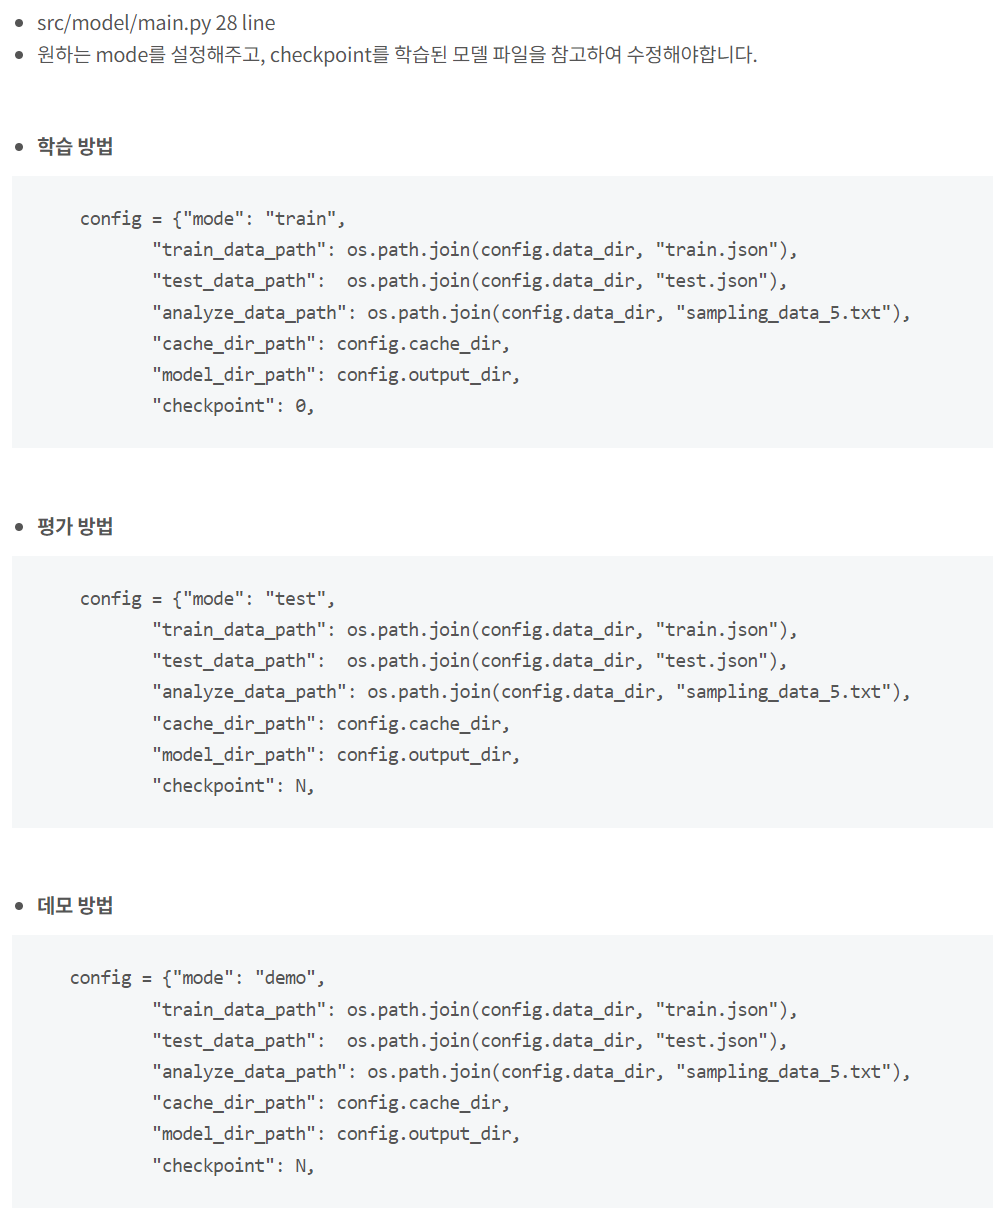

In [ ]:
if __name__ == "__main__":

    if not os.path.exists(cache_dir):
        os.makedirs(cache_dir)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    fine_vocab_path = os.path.join(data_dir, "fine_vocab.txt")
    coarse_vocab_path = os.path.join(data_dir, "coarse_vocab.txt")

    fine_vocab_map = {}
    coarse_vocab_map = {}

    with open(fine_vocab_path, 'r', encoding='utf-8') as vocab:
        for label in vocab:
            label = label.strip()
            fine_vocab_map[len(fine_vocab_map)] = label

    with open(coarse_vocab_path, 'r', encoding='utf-8') as vocab:
        for label in vocab:
            label = label.strip()
            coarse_vocab_map[len(coarse_vocab_map)] = label

    config = {"mode": "demo",
              "train_data_path": data_dir + "/train.json",
              "test_data_path":  data_dir + "/test.json",
              "cache_dir_path": cache_dir,
              "model_dir_path": output_dir,
              "checkpoint": 5,
              "epoch": 5,
              "learning_rate": 1e-5,
              "dropout_rate": 0.3,
              "warmup_steps": 0,
              "max_grad_norm": 1.0,
              "batch_size": 32,
              "test_batch_size": 32,
              "max_length": 128,
              "lstm_hidden": 256,
              "lstm_num_layer": 1,
              "bidirectional_flag": True,
              "fine_tag": 9,
              "coarse_tag": 3,
              "fine_map": fine_vocab_map,
              "coarse_map": coarse_vocab_map,
              "gradient_accumulation_steps": 1,
              "weight_decay": 0.0,
              "adam_epsilon": 1e-8
    }

    helper = Helper(config)

    if config["mode"] == "train":
        helper.train()
    elif config["mode"] == "test":
        helper.test()
    elif config["mode"] == "demo":
        helper.demo()

토크나이저 불러오는 중...
토크나이저 불러오기 성공
korscibert 불러오는 중...


Some weights of the model checkpoint at /content/drive/MyDrive/kisti_baseline/pytorch_model.bin were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


korscibert 불러오기 성공
문장을 입력하세요 : 개체명 인식은 정보 추출의 하위 작업으로, 문서에서 개체명에 해당하는 단어를 찾아 알맞은 개체명을 분류하는 자연어처리 기술이다.

입력 문장 	: 개체명 인식은 정보 추출의 하위 작업으로, 문서에서 개체명에 해당하는 단어를 찾아 알맞은 개체명을 분류하는 자연어처리 기술이다.
대분류 결과 	: 연구 목적
세부분류 결과 : 기술 정의



In [17]:
!nvidia-smi

Sun Oct 16 01:16:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   8272MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------